In [1]:
#### Simple K-means clustering with own random data
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

points = ['b', 'r', 'g', 'c']
num_groups = 4
num_centroids = 4
g_size = 50
std = 30
groups = np.array([np.random.randint(i*std, (i+1)*std, size=(g_size,2)) \
                   for i in range(num_groups)])
centroids = np.array([groups[np.random.randint(num_groups)][np.random.randint(g_size)] \
                     for _ in range(num_centroids)])

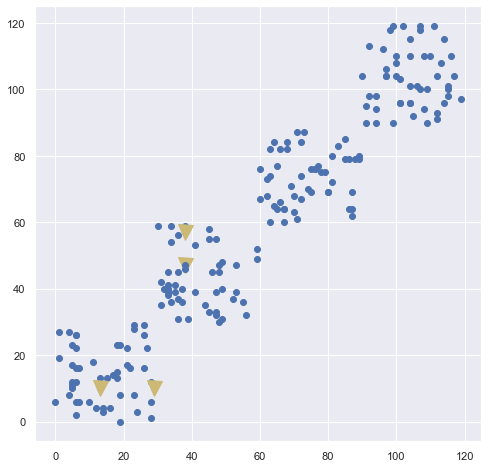

In [2]:
sns.set()
fig, ax = plt.subplots(figsize=(8, 8))
for c, p, g in zip(centroids, points, groups):
    ax.plot(g[:, 0], g[:, 1], 'bo')
    ax.plot(*c, 'yv',  markersize=15)
plt.show()

In [3]:
costs = []
best_cluster = None
min_cost = 10**4
samps = groups.reshape((-1, 2))
for _ in range(5):
    # Testing for different centroid initialization
    centroids = np.array([groups[np.random.randint(num_groups)][np.random.randint(g_size)] \
                     for _ in range(num_centroids)])
    clusters = [[] for _ in range(num_centroids)]
    n_iters = 20
    while n_iters > 0:
        J_cost = 0
        # Cluster assigment
        for i, e in enumerate(samps):
            distances = [np.linalg.norm(e - c) for c in centroids]
            min_idx = np.argmin(distances)
            J_cost += distances[min_idx]
            clusters[min_idx].append(i)
            for group in clusters[:min_idx] + clusters[min_idx+1:]:
                if i in group:
                    group.remove(i)

        # Move centroid
        moves = [np.mean(samps[group], axis=0) for group in clusters]
        centroids = moves
        costs.append(J_cost/len(samps))
        n_iters -= 1
    
    if costs[-1] < min_cost:
        min_cost = costs[-1]
        best_clusters = clusters
        best_centroids = centroids

11.032608922895413


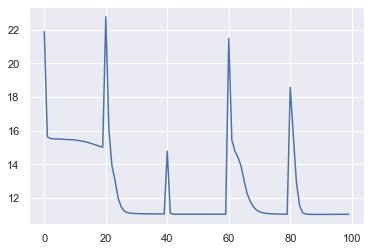

In [4]:
plt.plot(costs)
print(np.min(costs))

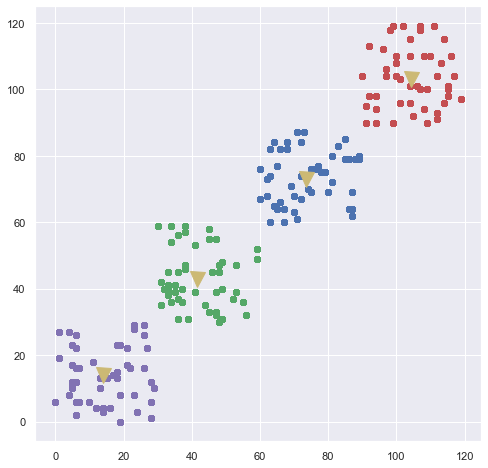

In [5]:
# Best cluster vis
fig, ax = plt.subplots(figsize=(8, 8))
points = ['b', 'r', 'g', 'm']
for c, p, g in zip(best_centroids, points, best_clusters):
    ax.plot(samps[g][:, 0], samps[g][:, 1], p+'o')
    ax.plot(*c, 'yv', markersize=15)
plt.show()